In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0


In [2]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


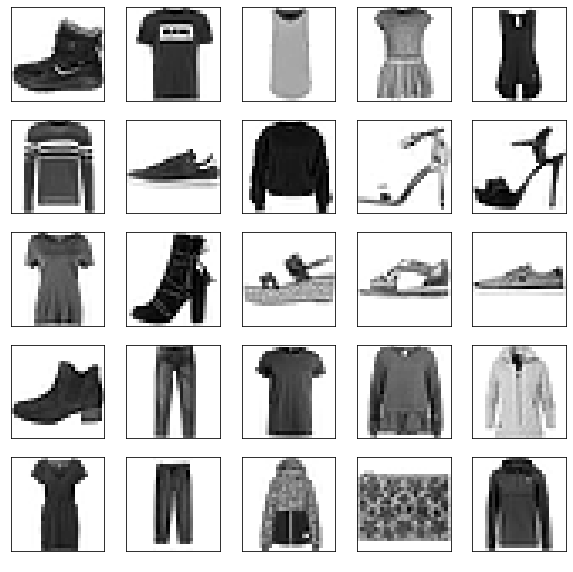

In [3]:
# show images
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()
font = {"color": "white"}
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], fontdict=font)
plt.show()


In [4]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


In [5]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


In [6]:
# can run multiple times
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4941 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3336 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2940 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2557 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [7]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3370 - accuracy: 0.8805 - 793ms/epoch - 3ms/step

Test accuracy: 0.8805000185966492


In [8]:
probability_model = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Softmax()
    ]
)
predictions = probability_model.predict(test_images)


In [13]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(
        predictions_array), class_names[true_label]), color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


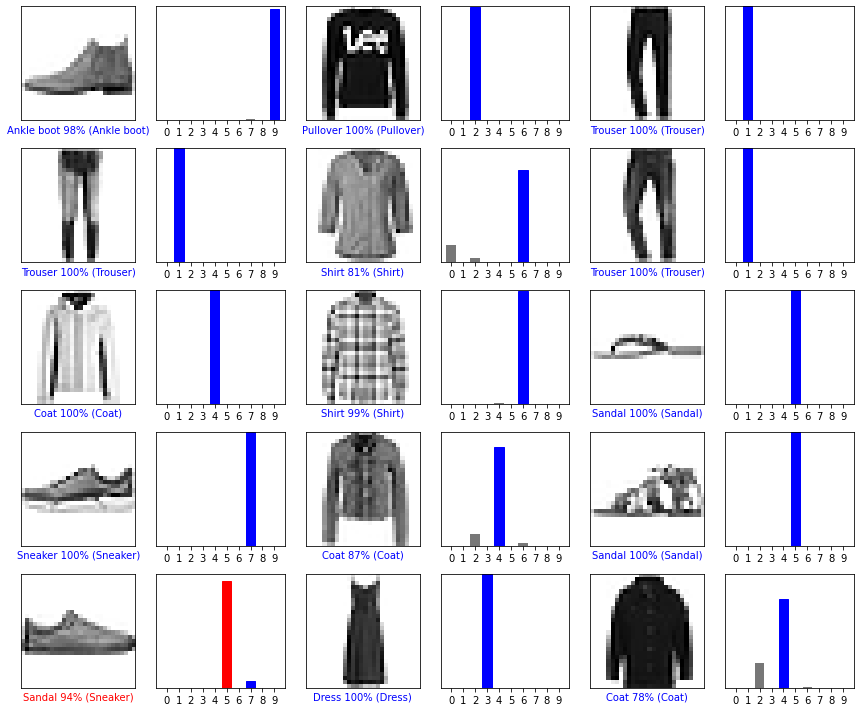

In [19]:
i = 12
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [22]:
img = test_images[1]
img = np.expand_dims(img, 0)
pred = probability_model.predict(img)
pred


array([[1.54596000e-05, 1.01738424e-16, 9.96991515e-01, 1.12766636e-11,
        2.59234617e-03, 6.30333133e-19, 4.00654768e-04, 4.54511221e-18,
        2.68835128e-12, 1.56415747e-13]], dtype=float32)

In [24]:
np.argmax(pred[0])


2

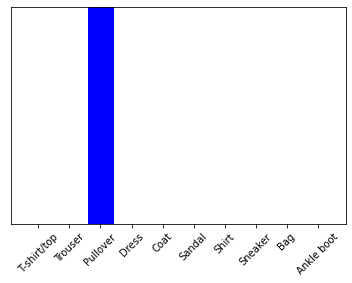

In [23]:
plot_value_array(1, pred[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [3]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)


In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])


In [13]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1424 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9758


In [14]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])


In [15]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.14335770e-07, 1.20655725e-08, 8.76376816e-06, 1.07446773e-04,
        7.71407764e-12, 3.37208462e-07, 1.44286411e-13, 9.99882221e-01,
        4.90011338e-08, 1.01314947e-06],
       [5.36421219e-09, 4.96238761e-04, 9.99502182e-01, 9.07388539e-07,
        5.59455390e-12, 2.61187381e-07, 3.16573988e-07, 3.30467875e-11,
        3.68982578e-09, 4.07914154e-13],
       [3.68835856e-07, 9.94760692e-01, 5.75432321e-04, 9.63876937e-06,
        2.98369414e-04, 1.39225149e-05, 1.84049586e-05, 4.22991812e-03,
        8.94097248e-05, 3.86684724e-06],
       [9.99853253e-01, 6.17895850e-08, 8.01444767e-05, 3.68841626e-07,
        3.05848266e-06, 4.76945479e-06, 5.92780225e-06, 8.44221358e-06,
        4.26467039e-08, 4.39418582e-05],
       [4.46468448e-06, 5.56765745e-09, 1.62734648e-06, 4.26151914e-08,
        9.97914612e-01, 1.19122240e-06, 7.18359297e-06, 1.42672470e-05,
        3.38707173e-06, 2.05322239e-03]], dtype=float32)>

In [11]:
loss_fn(y_train[:1], predictions)


<tf.Tensor: shape=(), dtype=float32, numpy=2.432898>

In [9]:
tf.nn.softmax(predictions)


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.19798155, 0.08050425, 0.05993435, 0.07639226, 0.06272591,
        0.08778208, 0.14730999, 0.09674516, 0.08681361, 0.10381083]],
      dtype=float32)>

In [2]:
# text classification
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


In [4]:
# sentiment (positive/negative) analysis of movie reviews
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(
    "aclImdb_v1", url, untar=True, cache_dir=".", cache_subdir="")
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')


In [14]:
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
shutil.rmtree(os.path.join(train_dir, 'unsup'))
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [15]:
from tensorflow.keras.utils import text_dataset_from_directory
batch_size = 32
seed = 42

raw_train_ds = text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [16]:
raw_val_ds = text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [17]:
raw_test_ds = text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)


Found 25000 files belonging to 2 classes.


In [9]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [18]:

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [19]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [20]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))


Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

In [24]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds =raw_test_ds.map(vectorize_text)

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [27]:
# create the model
embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [28]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(threshold=0.0)
)


In [32]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2207 - binary_accuracy: 0.9205 - val_loss: 0.2892 - val_binary_accuracy: 0.8804
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2080 - binary_accuracy: 0.9254 - val_loss: 0.2874 - val_binary_accuracy: 0.8812
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1979 - binary_accuracy: 0.9293 - val_loss: 0.2866 - val_binary_accuracy: 0.8810
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1875 - binary_accuracy: 0.9334 - val_loss: 0.2870 - val_binary_accuracy: 0.8806
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1791 - binary_accuracy: 0.9387 - val_loss: 0.2877 - val_binary_accuracy: 0.8814
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1713 - binary_accuracy: 0.9408 - val_loss: 0.2896 - val_binary_accuracy: 0.8830
Epoch 7/10
625/625 [==============================] - 4s 7ms/ste

In [37]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


782/782 [==============================] - 58s 73ms/step - loss: 0.3344 - binary_accuracy: 0.8683 3s - 
Loss:  0.3344211280345917
Accuracy:  0.8682799935340881


In [2]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices(
    "GPU") else "NOT AVAILABLE")


GPU is NOT AVAILABLE
